### scikit-learn: machine learning in Python (https://scikit-learn.org/stable/)

### Regression metrics

### Mean Absolute Error (MAE)


$MAE=\frac{1}{n}\sum\limits^{n}_{i=1}|y_i - \hat{y}_i|$


### Mean Square Error (MSE)

$MSE=\frac{1}{n}\sum\limits^{n}_{i=1}(y_i - \hat{y}_i)^2$

*Obs: erros mais altos são punidos*

### Root Mean Square Error (RMSE)

$RMSE=\sqrt{\frac{1}{n}\sum\limits^{n}_{i=1}(y_i - \hat{y}_i)^2}$

*Obs:tem mesma unidade que $y$*

*Todas são loss function*


In [ ]:
# Calculando
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print("MSE:",metrics.mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

## KNN
-----------------

In [1]:
# Importações
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Carregando Boston dataset
from sklearn.datasets import load_boston
boston = load_boston()

In [5]:
# Normalizando os dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [6]:
scaler.fit(boston.data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [7]:
dados_normalizados = scaler.transform(boston.data)
dados_normalizados

array([[-0.41771335,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41526932, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41527165, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ..., 
       [-0.41137448, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40568883, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41292893, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

### Mini Tarefa
Faça um DataFrame Pandas a partir dos dados Normalizados e o alvo.

In [17]:
df = pd.DataFrame(dados_normalizados)
df.columns = boston.feature_names
df['PRICE'] = boston.target
df.head()
df.to_csv

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,-0.417713,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,24.0
1,-0.415269,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,21.6
2,-0.415272,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,34.7
3,-0.414680,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,33.4
4,-0.410409,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,36.2


In [39]:
n,_ = df.shape
filter=np.full((n,),False)
df[filter].shape
filter.sum()==0

True

In [76]:
import operator
orted_x = dict(sorted(dic_filter.items(), key=operator.itemgetter(0)))
orted_x
list(orted_x.keys())[0]

'delay_1'

In [62]:
m=np.min(list(dic_filter.values()))
del dic_filter[m]

KeyError: 1

In [30]:
#df[df.columns[2]]
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=3, test_size=0.5, random_state=0)
sss.split(df,df['PRICE'])

<generator object BaseShuffleSplit.split at 0x000001D1DD592308>

In [28]:
# Teste e Treino
from sklearn.model_selection import train_test_split
X = df.drop('PRICE',axis=1)
y = df['PRICE']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)



In [11]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)


In [12]:
# Treinando o modelo
knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [13]:
from sklearn.metrics import mean_squared_error
y_pred = knn.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print('rmse:{}'.format(rmse))

rmse:5.649924778260327


## Mini Tarefa
Qual o melhor número de vizinhos entre 1 e 30 ?

In [ ]:
ks = np.arange(1,31)
results = np.zeros(30)
for k in ks:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    results[k-1] = np.sqrt(mean_squared_error(y_test,y_pred))
best_k = results.argmin()+ 1
low_rmse = results.min()
print ("Melhor k:{}, com RMSE:{}".format(best_k,low_rmse))    

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(ks,results,marker='o',linestyle='--',color='blue')
plt.title("RMSE vs K")

## Validação Cruzada 
--------------------------------
http://scikit-learn.org/stable/modules/model_evaluation.html

In [14]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':list(range(1, 31))}
knn = KNeighborsRegressor()
grid = GridSearchCV(knn, parameters,cv=10,scoring='neg_mean_squared_error')
grid.fit(X_train,y_train)
#grid.cv_results_
grid.best_params_

{'n_neighbors': 3}

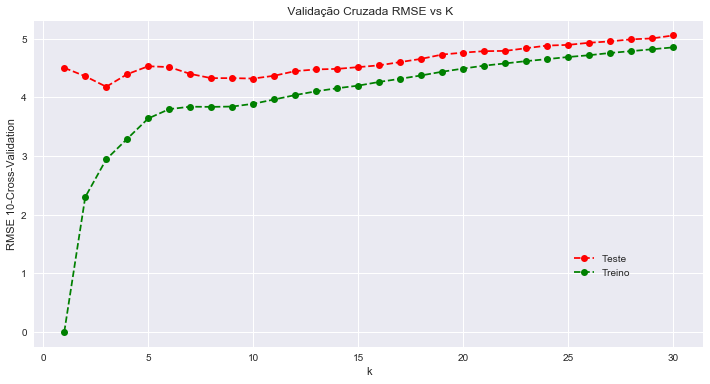

In [67]:

# Erros de Teste
mea_cv_test = grid.cv_results_['mean_test_score']
rmse_cv_test = np.sqrt(np.abs(mea_cv_test))
# Erros de Treino
mea_cv_train = grid.cv_results_['mean_train_score']
rmse_cv_train = np.sqrt(np.abs(mea_cv_train))

# Fazendo o Gráfico
plt.figure(figsize=(12,6))
plt.plot(ks,rmse_cv_test,marker='o',linestyle='--',color='red')
plt.plot(ks,rmse_cv_train,marker='o',linestyle='--',color='green')
plt.legend(['Teste','Treino'],loc=(0.8,0.2))
plt.title(" Validação Cruzada RMSE vs K")
plt.xlabel('k')
plt.ylabel('RMSE 10-Cross-Validation')



In [ ]:
grid.cv_results_

In [16]:
# Usando o melhor modelo para predições
knn = grid.best_estimator_
y_pred = knn.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

5.306104423402048

## Support Vector Machine (SVM)
------------------------------------------------

In [ ]:
# Importações
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Mini Tarefa

 * Carregue o DataFrame Boston
 * Normaliza o DataFrame Boston

In [ ]:
# Carregando Boston dataset
from sklearn.datasets import load_boston
boston = load_boston()

# Normalizando os dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(boston.data)

dados_normalizados = scaler.transform(boston.data)
dados_normalizados

In [ ]:
# Fazendo um  DataFrame
df = pd.DataFrame(dados_normalizados)
df.columns = boston.feature_names
df['PRICE'] = boston.target
df.head()
X = df.drop('PRICE',axis=1)
y = df['PRICE']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [ ]:
from sklearn import svm
svr = svm.SVR()
svr.fit(X_train,y_train)


In [ ]:
from sklearn.metrics import mean_squared_error
y_pred = svr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print('rmse:{}'.format(rmse))

In [ ]:
# Ajustando SVR (Tunning)
from sklearn.model_selection import GridSearchCV
svr = svm.SVR()
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
grid = GridSearchCV(svr, param_grid,cv=10,scoring='neg_mean_squared_error')
grid.fit(X_train,y_train)
#grid.cv_results_
grid.best_params_


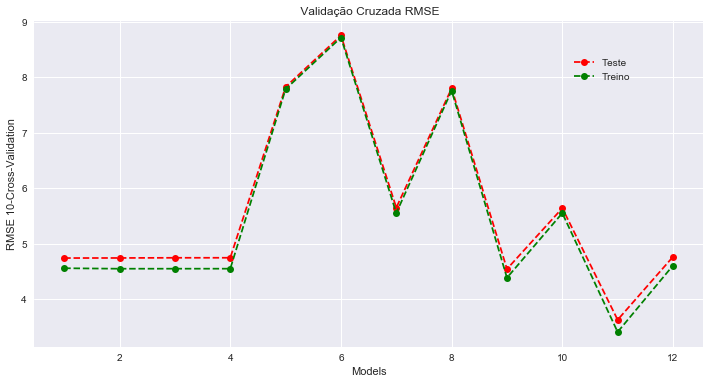

In [25]:
# Erros de Teste
mea_cv_test = grid.cv_results_['mean_test_score']
rmse_cv_test = np.sqrt(np.abs(mea_cv_test))
# Erros de Treino
mea_cv_train = grid.cv_results_['mean_train_score']
rmse_cv_train = np.sqrt(np.abs(mea_cv_train))
# Eixos dos X
parm_c = grid.cv_results_['param_C'].data
n_model = np.arange(1,len(parm_c)+1)
# Fazendo o Gráfico
plt.figure(figsize=(12,6))
plt.plot(n_model,rmse_cv_test,marker='o',linestyle='--',color='red')
plt.plot(n_model,rmse_cv_train,marker='o',linestyle='--',color='green')
plt.legend(['Teste','Treino'],loc=(0.8,0.8))
plt.title(" Validação Cruzada RMSE")
plt.xlabel('Models')
plt.ylabel('RMSE 10-Cross-Validation')

In [27]:
rmse_cv_train

array([ 4.55471117,  4.5457404 ,  4.54633522,  4.54635617,  7.78391337,
        8.71381556,  5.55043849,  7.75533135,  4.38285941,  5.54800985,
        3.40556278,  4.60370024])